# B3C-CTR1 Exercice 3.8

On considère la réaction élémentaire suivante en phase gazeuse:

$$2𝐴+𝐵 \xrightarrow{k} 𝐶$$

La constante de vitesse de cette réaction est 10 L<sup>2</sup>/mol<sup>2</sup>∙s. Vous voulez effectuer cette réaction dans un réacteur tubulaire industriel isotherme de 250 L avec un débit volumique entrant de 4 L/s. Le réacteur est maintenu à une température de 500 K et une pression de 16.4 atm. Il n’y a pas de perte de charge le long du réacteur et les fractions molaires de A et de B dans le mélange réactionnel sont toutes deux de 0.5.

- Tracer les profils de concentration des différentes espèces chimiques dans le réacteur tubulaire.
- Quels temps de passage seront nécessaires pour atteindre des conversion de 80 % et de 99 % dans un tel réacteur?


## Solution

On commence par importer les packages nécessaires pour la résolution

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

On configure le problème à résoudre en définissant les constantes et les conditions initiales.

In [2]:
# Définition des constantes
R = 0.0821 # L * atm/mol * K

k = 10 # L2/mol2*s
Vdot0 = 4 # L/s
yA0 = 0.5 # -
p0 = 16.4 # atm
T0 = 500 # K
alpha = -0.5 # -


In [3]:
# Définition des équations différentielles
def bilans(y, V, FA0, Vdot0, alpha, k):
    # On récuprère les variables dépendantes
    FA, FB, FC = y
    
    # Comme le débit volumique varie en fonction de la concentration, on
    # commence par calculer le taux de conversion puis le débit.
    X = 1 - FA / FA0
    Vdot = Vdot0 * (1 + alpha * X)
    
    # A l'aide du débit volumique, on peut calculer les concentration
    # en vue du calcul de la cinétique.
    CA = FA / Vdot
    CB = FB / Vdot
    CC = FC / Vdot

    # Vitesse de réaction = f(CA, CB)
    r = k * CA**2 * CB

    # Vitesse de transformation
    RA = -2 * r
    RB = -r
    RC = r

    # Bilans de matières sur A, B et C pour un réacteur PFR
    dFAdV = RA
    dFBdV = RB
    dFCdV = RC

    return [dFAdV, dFBdV, dFCdV]
    

In [4]:
# Conditions initiales (débits molaires!)
CA0 = yA0 *  p0 / (R * T0) # mol/L (selon la loi des gaz parfaits)
CB0 = CA0 # mol/L
CC0 = 0 # mol/L 

FA0 = CA0 * Vdot0 # mol/L * L/s = mol/s
FB0 = CB0 * Vdot0 # mol/s
FC0 = 0 # mol/s

y0 = [FA0, FB0, FC0] # mol/s



In [5]:
# Domaine d'intégration
V = np.linspace(0, 250, 251) # L

In [7]:
# Résolution
y = odeint(bilans, y0, V, (FA0, Vdot0, alpha, k));

In [8]:
# Après la résolution, on doit recalculer les concentrations. Donc:
#  1. Extraire les débits molaires de y
#  2. Calculer le vecteur taux de conversion en fonction de la position V
#  3. Calculer le vecteur débit volumique en fonction de la position
#  4. Calculer les vecteurs concentration en fonction de la position
FA = y[:,0]
FB = y[:,1]
FC = y[:,2]

X = 1 - FA / FA0
Vdot = Vdot0 * (1 + alpha * X)

CA = FA / Vdot
CB = FB / Vdot
CC = FC / Vdot

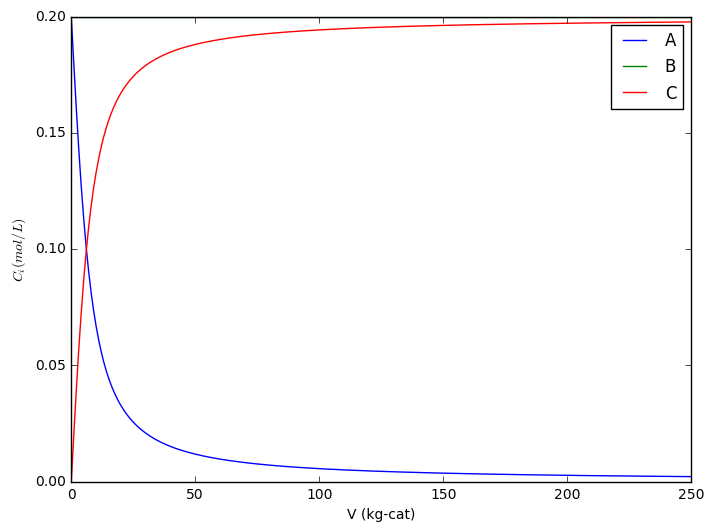

In [9]:
plt.figure(1, figsize=(8, 6), dpi=100)
plt.plot(V, CA, V, CB, V, CC)
plt.xlabel('V (kg-cat)')
plt.ylabel('$C_{i} (mol/L)$')
plt.legend (['A','B', 'C'])
plt.show()

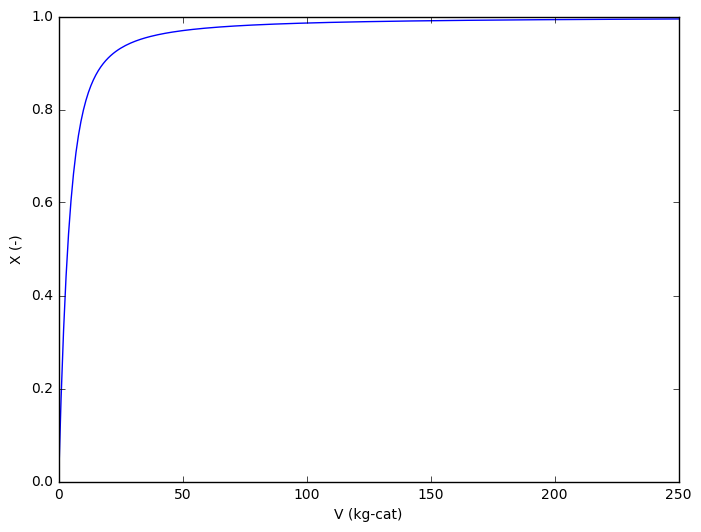

In [10]:
plt.figure(2, figsize=(8, 6), dpi=100)
plt.plot(V, X)
plt.xlabel('V (kg-cat)')
plt.ylabel('X (-)')
plt.show()